In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nadia = cv2.imread('../Reference/DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../Reference/DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../Reference/DATA/solvay_conference.jpg',0)

In [3]:
def show_img(img):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    ax.imshow(img,cmap='gray')

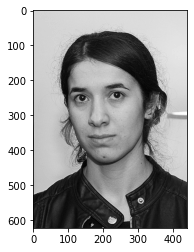

In [4]:
plt.imshow(nadia,cmap='gray')

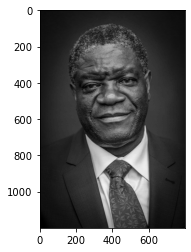

In [5]:
plt.imshow(denis,cmap='gray')

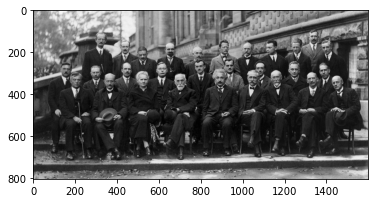

In [6]:
plt.imshow(solvay,cmap='gray')

## Use pretrained XML cascade classifiers

In [7]:
face_cascade = cv2.CascadeClassifier('../Reference/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

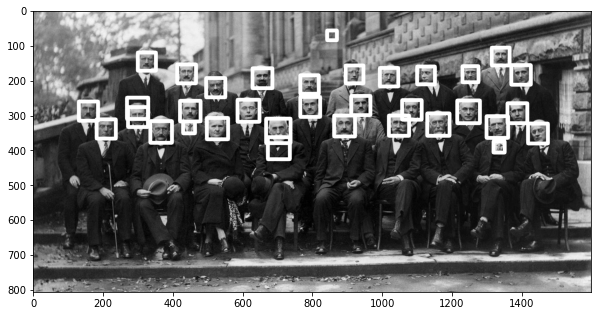

In [9]:
result = detect_face(solvay)
show_img(result)

In [10]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.1,minNeighbors=6)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

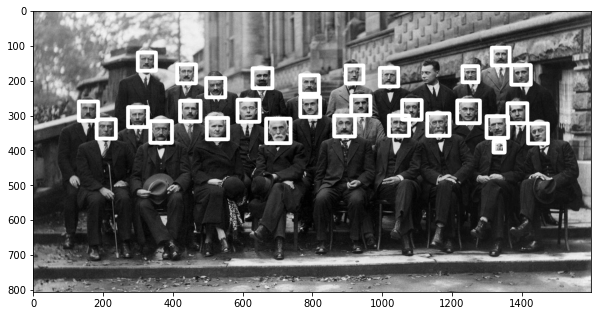

In [11]:
result = adj_detect_face(solvay)
show_img(result)

# Try eye cascade 

In [12]:
eye_cascade = cv2.CascadeClassifier('../Reference/DATA/haarcascades/haarcascade_eye.xml')

In [13]:
def eye_detect(img):
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),255,10)
    
    return face_img

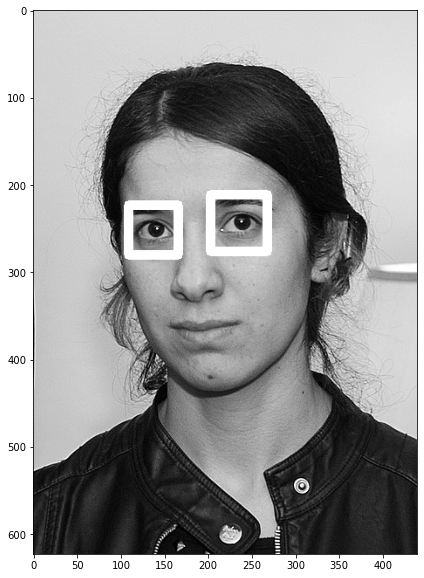

In [14]:
result = eye_detect(nadia)
show_img(result)

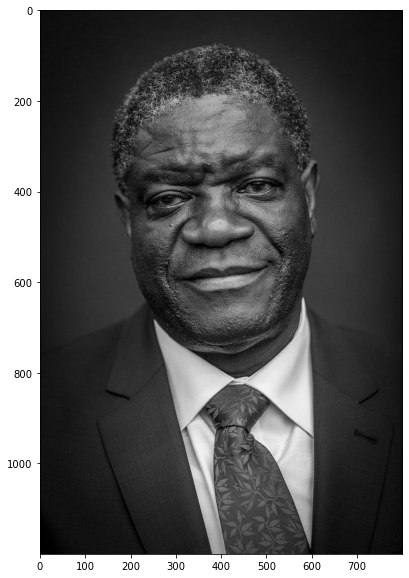

In [15]:
result = eye_detect(denis)
show_img(result)

# Perform face detection on faces

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detection',frame)
    
    k = cv2.waitKey(1)
    if k==27:
        break
    
cap.release()
cv2.destroyAllWindows()